In [1]:
import numpy as np
import pandas as pd
import random
from random import choice
import math 
import networkx as nx
import matplotlib.pyplot as plt
from tkinter import Grid
import scipy.stats

# Part 1: Binning degree distributions

A. Binning real numbers

Using random library to generate 5000 data points from a Gaussian distribution.

In [46]:
x = np.random.normal(loc=2, scale=0.125, size=5000)

Using numpy.histogram to bin those number into 10 bins. 

In [47]:
bins = 10 # define number of bins 
ranged = None
normed = None
weights = None
density = None

hist = np.histogram(x, bins, ranged, normed, weights, density) # Constructs a hist with number of bins 
print(hist)

(array([  11,   53,  340,  836, 1408, 1337,  735,  229,   44,    7],
      dtype=int64), array([1.54387974, 1.63719948, 1.73051923, 1.82383897, 1.91715872,
       2.01047846, 2.10379821, 2.19711795, 2.2904377 , 2.38375744,
       2.47707719]))


The 'numpy.histogram' produces two arrays, one with limit of bins and one with the amount of data points in each bin.
<br> The array of data points has a length of 10 while the array of bin limits has a length of 11. 
This is because it takes two bin limits to form one bin, but the two outer limits are only used once. Because of this, we simply remove the top limit.

In [48]:
alteredY = [] # We create a new list for the y-coordinate for our line plot 
for i in hist[0]:
    alteredY.append(i) 
    alteredY.append(i) #  the list contains a duplicate of each occurency in order to 
                       #  plot the bin limits paired with the occurency of data points 

In [49]:
alteredX = [] # We create a new list for the x-coordinate (bin limits) for our line plot

alteredX.append(hist[1][0])
for i in hist[1][1:-1]:  
    alteredX.append(i) # create duplicate for each value in binlimits except the two outer-limit values 
    alteredX.append(i)
alteredX.append(hist[1][-1])

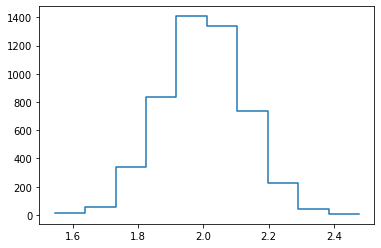

In [50]:
# Plot of the binned data 
plt.plot(alteredX,alteredY)

B. Binning integers 


In [51]:
xp = np.random.poisson(lam=10, size=5000) # Generates 5000 number from a Poission distribution

min = xp[0]
max = xp[0]
for i in xp:    # Iterates over values in xp and finds max and min
    if i > max:
        max = i
    if i < min:
        min = i
        
print("min: {}, max: {}".format(min,max)) 




min: 1, max: 25


Sum of bincounts: 25


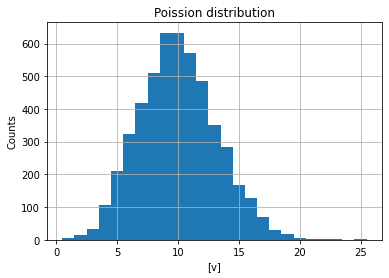

In [52]:
from tkinter import Grid

# creates vector v to contain each integer value in its own bin
v = [min-0.5]

# iterates from 1 to max(xp) to generate bin-vector
for i in range(1,max+1):
    v.append(v[i-1]+1)
    
hist = np.histogram(xp,v) # generates histogram parameters 


# barplot of the poisson distribution
plt.bar(x=v[0:-1], height= hist[0], width= 1.0, align= 'edge') # Remove last bin limit
plt.grid("True")
plt.xlabel("[v]")
plt.ylabel("Counts")
plt.title("Poission distribution")

# calculating the sum of bincounts
print("Sum of bincounts: {}".format(sum(np.bincount(hist[0]))))


To construct the binning vector we used the min-value in <xp> to set the lower bin limit by simply subtracting 0.5, so that each integer value is in its own bin.
In general the np.histogram will set the bin range, as (a.min(), a.max()). 'a' being the input data. Which in this case is the the xp-array generated from the gaussion distribution.  

In [53]:
N = 5000
p = 10/(N-1)

In [11]:
ER = nx.erdos_renyi_graph(N, p, seed=None, directed=False)

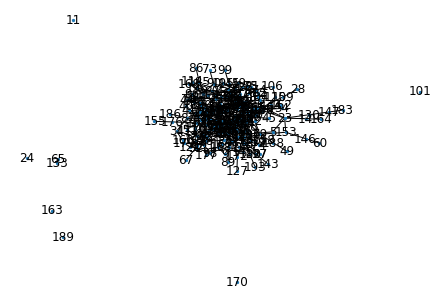

In [56]:
'''
pos = [nx.spring_layout(ER)]
options = {
    "node_color": 'black',
    "node_size": 5,
    "edge_color": 'r',
    "with_labels": False,
}
plt.figure(figsize=(12,8))
nx.draw_networkx(ER,pos[0], **options)
plt.show()
'''
nx.draw(ER, with_labels=True, node_size=5)

In [13]:
dd = []
min = ER.degree[0]
max = ER.degree[0]
for n in range(len(ER.nodes)):
    dd.append(ER.degree[n])
    if ER.degree[n] < min:
        min = ER.degree[0]
    if ER.degree[n] > max:
        max = ER.degree[n]

In [14]:
binEdges = [min-0.5]
for i in range(1,max+1):
    binEdges.append(binEdges[i-1]+1)

In [16]:
histdd = np.histogram(dd, binEdges)

<BarContainer object of 24 artists>

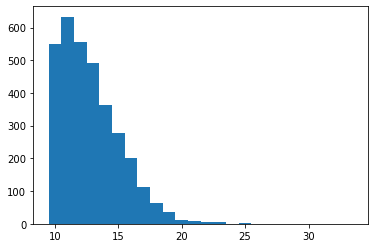

In [19]:
plt.bar(x=binEdges[1:], height=histdd[0], width=1.0, align = 'edge')

# Part 2

# Erdős-Rényi Networks
Consider an Erdős-Rényi network with N = 3,000 nodes, connected to each other with probability p = 10^(-3)

1.What is the expected number of links?

In [2]:
P = 10**(-3)
N = 3000
EXPECTED_LINK_NUMBER = P*N*(N-1)*0.5
EXPECTED_LINK_NUMBER

4498.5

In [6]:
# TEST IT: Monte Carlo TEST
L = 0
for i in range(4498500):  #(N(N-1)/2)
    x = random.random()
    if x < 10**(-3):
        L = L + 1

print(L)

# Almost same

4493


2.In which regime is the network?

In [7]:
P = 10**(-3)
N = 3000
Average_K = P*(N-1)
Average_K

2.999

In [ ]:
# Because Average_K > 1 , so it is in the Supercritical Regime.

3.Calculate the probability P_c so that the network is at the critical point

In [8]:
# We need to let p = 1/N
P_c = 1/3000
P_c

0.0003333333333333333

In [ ]:
# P_c = 0.0003333333333333333

4.Given the linking probability p = 10**(–3), calculate the number of nodes Ncr so that the network has only one component.

In [9]:
#According to the formula 3.41: p = ln N/ N
#We use wolframalpha to calculate, N1 = 1.001, N2 = 9118.01
#We can draw a simple graph about this equation:
# Np = ln N, namely 0.001*N = ln N, 
# the solution is the intersection of a linear equation function and a logarithmic function.
# So we can find 2 solutions, one is extremely close to N=1, the other is calculated as 9118

N_CR = 9118
N_CR

9118

5.For the network in (d), calculate the average degree 〈kcr〉 and the average distance between two randomly chosen nodes 〈d〉.

In [10]:
P = 0.001
N = 9118
Average_KCR = P*(N-1)
Average_KCR

9.117

In [11]:
# Average distance = ln N / ln <K>
Average_Disdance = np.log(N)/np.log(Average_KCR)
Average_Disdance

4.125531617730235

6.Calculate the degree distribution pk of this network (approximate with a Poisson degree distribution).

In [12]:
# The probability that the degree of the node is k:  p**k
# The probability that the remaining (N-1-k) links are missing: (1-p)**(N-1-k) 
# The number of ways we can select k links from N- 1 potential links a node can have: C (k,N-1)


# So, pk = math.exp(-Average_KCR)*Average_KCR**k/math.factorial(k)
# For example, we try k = 3
k=3
pk = math.exp(-Average_KCR)*Average_KCR**k/math.factorial(k)
print('when k = 3, pk=',pk)

when k = 3, pk= 0.013865700733935013


d:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Poisson Distribution'), Text(0, 0.5, 'Frequency')]

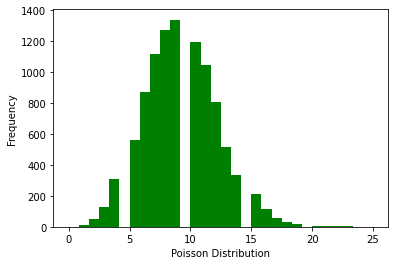

In [13]:
# Make a graph about the degree distribution
from scipy.stats import poisson
import seaborn as sns
data_poisson = poisson.rvs(mu=Average_KCR, size=10000)
ax = sns.distplot(data_poisson,
                  bins=30,
                  kde=False,
                  color="green",
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

# Paths
Plot a random network with 200 nodes and an average degree of 1.5. (I suggest using networkx.draw and reading the documentation carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).

In [26]:
G = nx.Graph()
# <k> = 1.5 = p*(N-1)
# p = 1.5/(N-1)
N = 200
p = 1.5/(200-1)
N,p

(200, 0.007537688442211055)

In [27]:
# I do not know whether this function is right
def get_ER_graph(n,p):
    G = nx.Graph() # creat an empty graph
    G.add_nodes_from([i for i in range(n)]) # add the nodes
    # Next we add the edges:
    for i in G.nodes(): # traverse all the connections
        for j in G.nodes():
            if i != j:
                x = random.random()
                if x <= p:
                    G.add_edge(i,j)
                else:
                    continue
    return G

In [28]:
ER = get_ER_graph(200,p)

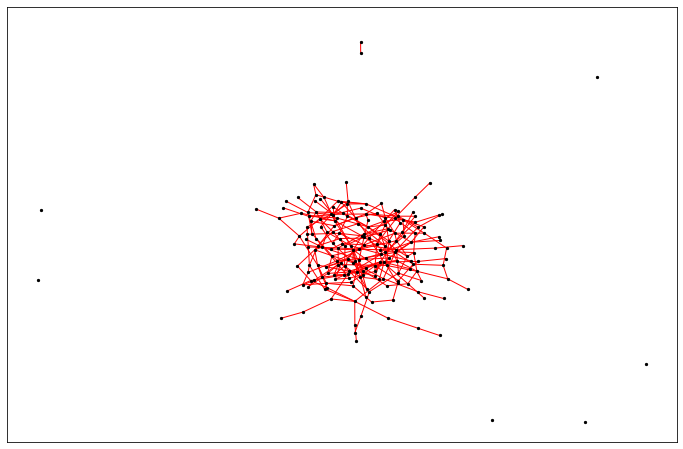

In [29]:
#nx.draw_networkx(G,[ pos, arrows, with_labels])

#pos = [nx.circular_layout(ER)]
pos = [nx.spring_layout(ER)]
options = {
    "node_color": 'black',
    "node_size": 5,
    "edge_color": 'r',
    "with_labels": False,
}
plt.figure(figsize=(12,8))
nx.draw_networkx(ER,pos[0], **options)
plt.show()

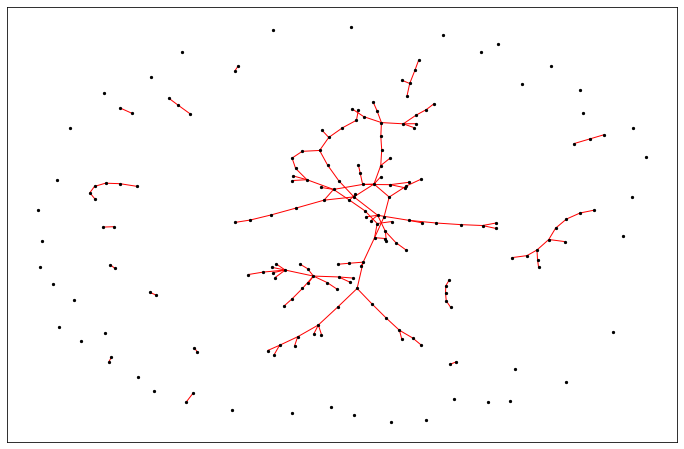

In [38]:
# Let's use the official library: nx.erdos_renyi_graph(n, p, seed=None, directed=False)
n = 200
k = 1.5
p = k / (n - 1)
ER2 = nx.erdos_renyi_graph(n, p, seed=None, directed=False)

pos = [nx.spring_layout(ER2)]
options = {
    "node_color": 'black',
    "node_size": 5,
    "edge_color": 'r',
    "with_labels": False,
}
plt.figure(figsize=(12,8))
nx.draw_networkx(ER2,pos[0], **options)
# nx.draw(ER, pos=nx.spring_layout(ER), node_size=20,node_shape='*')
plt.show()

Extract the Giant Connected Component, GCC. (Hint. You can use networkx.connected_component_subgraphs)

In [39]:
# connected_component_subgraphs(G, copy=True) 
# https://networkx.org/documentation/networkx-1.9/reference/generated/networkx.algorithms.components.connected.connected_component_subgraphs.html

GCCset = nx.connected_components(ER2)
GCCset

<generator object connected_components at 0x000001310C5D0AC0>

In [40]:
GCC_NODES = max(GCCset, key=len)
GCC_NODES

{1,
 5,
 8,
 18,
 19,
 21,
 22,
 24,
 25,
 26,
 28,
 30,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 42,
 43,
 46,
 48,
 52,
 56,
 61,
 63,
 64,
 65,
 68,
 69,
 75,
 82,
 83,
 86,
 88,
 90,
 91,
 96,
 97,
 101,
 102,
 104,
 105,
 109,
 115,
 119,
 122,
 123,
 127,
 129,
 133,
 134,
 136,
 139,
 143,
 144,
 146,
 147,
 148,
 150,
 155,
 158,
 160,
 162,
 163,
 164,
 165,
 166,
 168,
 169,
 170,
 172,
 173,
 174,
 179,
 181,
 183,
 185,
 186,
 187,
 188,
 189,
 190,
 193,
 194,
 196,
 199}

Choose a node at random from the GCC. (Hint: You may want to try random.choice.)

In [41]:
RANDOM_NODE = random.choice(list(GCC_NODES))
RANDOM_NODE

199

Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest networkx.single_source_shortest_path_length)

In [42]:
GCC_GRAPH = ER2.subgraph(GCC_NODES).copy()


In [43]:
# single_source_shortest_path_length(G, source, cutoff=None)
Dictionary_of_shortest_path_lengths_keyed_by_target = nx.single_source_shortest_path_length(GCC_GRAPH, RANDOM_NODE, cutoff=None)
Dictionary_of_shortest_path_lengths_keyed_by_target

{199: 0,
 194: 1,
 30: 1,
 164: 2,
 5: 2,
 46: 2,
 119: 2,
 160: 3,
 36: 3,
 169: 3,
 143: 3,
 115: 3,
 179: 3,
 61: 3,
 96: 4,
 65: 4,
 97: 4,
 33: 4,
 133: 4,
 69: 4,
 101: 4,
 139: 4,
 172: 4,
 146: 4,
 82: 4,
 127: 4,
 136: 5,
 147: 5,
 22: 5,
 150: 5,
 166: 5,
 170: 5,
 173: 5,
 185: 5,
 188: 5,
 83: 5,
 90: 5,
 102: 5,
 104: 5,
 129: 6,
 144: 6,
 18: 6,
 19: 6,
 25: 6,
 158: 6,
 32: 6,
 165: 6,
 52: 6,
 181: 6,
 56: 6,
 193: 6,
 134: 7,
 8: 7,
 21: 7,
 28: 7,
 38: 7,
 43: 7,
 174: 7,
 68: 7,
 75: 7,
 88: 7,
 122: 7,
 163: 8,
 42: 8,
 109: 8,
 148: 8,
 24: 8,
 186: 8,
 123: 8,
 189: 8,
 34: 9,
 162: 9,
 196: 9,
 168: 9,
 37: 9,
 48: 9,
 183: 9,
 26: 9,
 187: 9,
 35: 10,
 40: 10,
 105: 10,
 91: 10,
 86: 10,
 155: 10,
 190: 10,
 63: 10,
 64: 11,
 39: 11,
 1: 12}

In [44]:
precisely_2_steps_list = []
for key in Dictionary_of_shortest_path_lengths_keyed_by_target:
    if Dictionary_of_shortest_path_lengths_keyed_by_target[key] == 2:
        precisely_2_steps_list.append(key)

precisely_2_steps_list

[164, 5, 46, 119]

Plot the GCC with the following choice of colors. Starting node black ("#000000"). The nodes 2 steps away red ("#ff0000"). All other nodes blue ("#A0CBE2"). Again, I suggest using networkx.draw() and reading the documentation carefully find out how to color individual nodes.

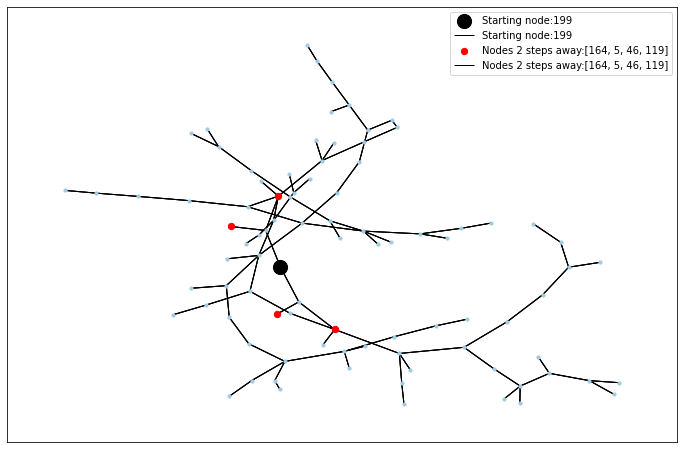

In [45]:
pos = [nx.spring_layout(GCC_GRAPH)]

GCC_NODE_LIST = list(GCC_NODES)

colors = ['#000000', '#ff0000', '#A0CBE2']



# First draw the original GCC graph
options = {
    "nodelist": GCC_NODE_LIST,
    "node_color": colors[2],
    "node_size": 10,
    "edge_color": 'BLACK',
    "with_labels": False,
}
plt.figure(figsize=(12,8))
nx.draw_networkx(GCC_GRAPH,pos[0], **options)




# Starting node is here, marked Black

options = {
    "nodelist": [RANDOM_NODE],
    "node_color": colors[0],
    "node_size": 200,
    "with_labels": False
}
nx.draw_networkx(GCC_GRAPH,pos[0], **options,label=f'Starting node:{RANDOM_NODE}')



# Nodes 2 steps away are here

options = {
    "nodelist": precisely_2_steps_list,
    "node_color":colors[1],
    "node_size": 40,
    "with_labels": False
}
nx.draw_networkx(GCC_GRAPH,pos[0], **options,label=f'Nodes 2 steps away:{precisely_2_steps_list}')
plt.legend()
plt.show()

# Part 3: Watts-Strogatz Network 

Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p = 0, 0.1 and 1.

Calculate the average shortest path length <d> for each one. 


Describe what happens to the network when p = 1 

In [ ]:
# define paramters 
N = 500
k = 4
p = np.array([0,0.1,1])


# Generating Watt-Strogatz (WS) graph 
G = nx.watts_strogatz_graph(N,k,p[0])
G2 = nx.watts_strogatz_graph(N,k,p[1])
G3 = nx.watts_strogatz_graph(N,k,p[2])

# setting layout options 
options = {
    'node_color': 'orange',
    'node_size': 0.5,
    'width': 0.5,
}


# Drawing graph for each condition


pos = nx.circular_layout(G)
nx.draw(G,pos, **options)

pos2 = nx.circular_layout(G2)
nx.draw(G2,pos2, **options)

pos3 = nx.circular_layout(G3)
nx.draw(G3,pos3, **options)


plt.show()

# Computing the average shortest path length for each condition
ShortPath_G = nx.average_shortest_path_length(G)
ShortPath_G2 = nx.average_shortest_path_length(G2)
ShortPath_G3 = nx.average_shortest_path_length(G3)

print('With a p-value of 0.0 the average shortest path length in the graph is %s' % ShortPath_G)
print('With a p-value of 0.1 the average shortest path length in the graph is %s' % ShortPath_G2)
print('With a p-value of 1.0 the average shortest path length is the graph is  %s' % ShortPath_G3)

The p-value in the WS-model determines the randomness of the graph and by p = 1 all links have been rewired. Then WS network is then a random network. For the same p-value is 1 it shows the average shortest path length is at its lowest vcalue. 

Part B: Behaviour of the WS-model 

In [ ]:

# Creating a function that generates WS graph and the average shortest path length

def GraphGenerator(p):
    
    # defining parameters 
    n = 50 
    k = 6
    N = 500
    
    AvS = [] # creating empty list to fill with path lengths 
    
    for i in range(1,n+1):
    
        G = nx.watts_strogatz_graph(N,k,p)
        S = nx.average_shortest_path_length(G)
        
        AvS.append(S) # adding path lengths 
        
    A = np.mean(AvS)
    M = np.std(AvS)
    
    return A,M 
 
A,M = GraphGenerator(0)
A1,M1 = GraphGenerator(0.01)  
A2,M2 = GraphGenerator(0.03)
A3,M3 = GraphGenerator(0.05)
A4,M4 = GraphGenerator(0.1)
A5,M5 = GraphGenerator(0.2)  

x = np.array([0,0.01,0.03,0.05,0.1,0.2])  # array of p-values 

y = np.array([A,A1,A2,A3,A4,A5])  # average <d> for each condition
E = np.array([M,M1,M2,M3,M4,M5])  # list of the standard deviation across the networks 

from turtle import color
import matplotlib.pyplot as plt
plt.plot(x, y, 'o-')
plt.errorbar(x,y,yerr=E , color = "red")
plt.ylabel('<d>')
plt.xlabel('p-values')
plt.title('Wattz-strogats Network with p = {0, 0.01, 0.03, 0.05, 0.1, 0.2} and average shortest path length behaviour')

plt.show()



# 4 The Barabasi-Albert Model

Part A. 

Creating a 100 node BA neytwork


In [ ]:
# generate a graph with two linked notes 
BA = nx.Graph() 
BA.add_edge(0, 1)
nodeRep = [0,1]
nx.draw(BA)

In [18]:
# Iterates over range to add 100 nodes 
for i in range(2,100):
    choice = random.choice(nodeRep)
    BA.add_edge(i,choice)
    nodeRep.append(i)
    nodeRep.append(choice)

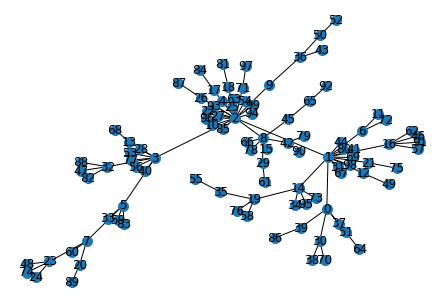

In [19]:
# draw the generated BA nerwork
nx.draw(BA, with_labels=True, node_size=100)

Part B. 
Creatinga 5000 node network 

In [20]:
# generating the basis of the graph
BA2 = nx.Graph()
BA2.add_edge(0, 1)
nodeRep2 = [0,1]

In [21]:
# adding the 5000 nodes 
for i in range(2,5000):
    choice = random.choice(nodeRep2)
    BA2.add_edge(i,choice)
    nodeRep2.append(i)
    nodeRep2.append(choice)

In [22]:
# findng max and min degree in the network 

max = BA2.degree[0]
min = BA2.degree[0]
dd = []
for i in range(len(BA2.nodes)): # iterate over nodes and adds each node's degree to empty list <dd>
    dd.append(BA2.degree[i])    
    if BA2.degree[i]<min:
        min = BA2.degree[i]
    if BA2.degree[i]>max:
        max = BA2.degree[i]

print("min degree of the 5000-BA network: {}, max degree of the 5000-BA network: {}".format(min,max)) 


In [23]:
binEdges = [min-0.5]  # create the bin edges vector 

for i in range(1,max+1):
    binEdges.append(binEdges[i-1]+1)

In [24]:
# compute histogram with degrees and bins-vector 
BA2_hist = np.histogram(dd, binEdges)

<BarContainer object of 108 artists>

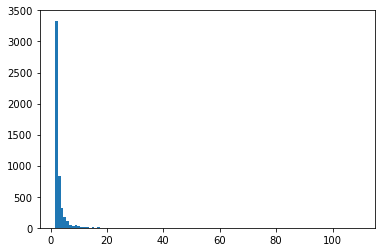

In [25]:
# display the distribution
plt.bar(x=binEdges[1:], height=BA2_hist[0], width=1.0, align = 'edge')
plt.title("Degree distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")



In [26]:
for i in range(len(binEdges)):
    binEdges[i] = binEdges[i] + 0.5

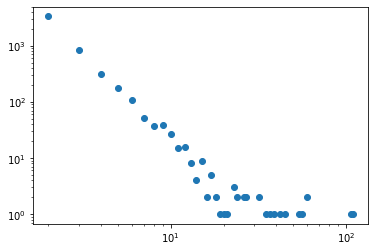

In [27]:
plt.loglog(binEdges[1:], BA2_hist[0], '-o')
plt.title("Degree distribution")
plt.xlabel("Degree [k]")
plt.ylabel("Frequency")


In [23]:
xLog = []
yLog = []
for i in range(len(binEdges)-1):
    if BA2_hist[0][i] != 0:
        xLog.append(math.log10(binEdges[i+1]))
        yLog.append(math.log10(BA2_hist[0][i]))

# 5 Power-laws and the friendship paradox

Pick a node i at random (e.g. use random.choice). Find its degree. Find i's neighbors. And calculate their average degree. Compare the two numbers to check if it's true that i's friends (on average) have more friends than. Do this 1000 times. How many out of those 1000 times is the friendship paradox true in F-BA?

In [45]:
F_BA = BA2

In [46]:
paradox = 0
for i in range(1000):
    
    count = 0.0
    sum = 0.0
    choice = random.choice(list(F_BA.nodes))
    for n in F_BA.neighbors(choice):
        count = count + 1
        sum = sum + F_BA.degree(n)
    if (sum/count)>F_BA.degree(choice):
        paradox = paradox + 1
        
print("{}/{}".format(paradox,1000))

857/1000


What if the power law is flatter? Will the fraction of times the paradox is true be higher or lower?

The flatter the power law is, the wider it will spread. This means that the extreme nodes will be even more extreme with a very high degree.

Because more nodes, or people as in this case, will have a very high amount of friends the average amount of friends increases to an extent where very few people have more friends than the average of their friend group.

In [47]:
sequence = nx.utils.powerlaw_sequence(n = 1000, exponent = 1.5)
sequence = [round(num) for num in sequence]
sequence.sort()

In [48]:
#checking if sum of degrees is odd, fixing it if it is
sum = 0
for degree in sequence:
    sum = sum + degree
if (sum % 2) != 0:
    sequence[0] = sequence[0] + 1

In [49]:
model = nx.configuration_model(sequence)

In [50]:
dd = []
min = model.degree[0]
max = model.degree[0]
for i in range(len(model.nodes)):
    dd.append(model.degree[i])
    if model.degree[i]<min:
        min = model.degree[i]
    if model.degree[i]>max:
        max = model.degree[i]

In [51]:
binEdges = [min-0.5]
for i in range(1,max+1):
    binEdges.append(binEdges[i-1]+1)

In [52]:
model_hist = np.histogram(dd, binEdges)

In [53]:
for i in range(len(binEdges)):
    binEdges[i] = binEdges[i] + 0.5

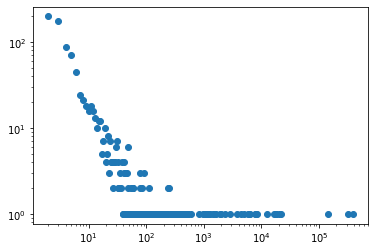

In [54]:
plt.loglog(binEdges[1:], model_hist[0], 'o')

In [55]:
paradox = 0
for i in range(len(model.nodes)):
    
    count = 0.0
    sum = 0.0
    choice = random.choice(list(model.nodes))
    for n in model.neighbors(choice):
        count = count + 1
        sum = sum + model.degree(n)
    if (sum/count)>model.degree(choice):
        paradox = paradox + 1
        
print("{}/{}".format(paradox,len(model.nodes)))

987/1000


Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true? I might consider how network properties like assortativity, clustering, community-structure, etc potentially could impact things (it's OK to search online and add references to your answer).

The friendship paradox is based on the assumption that almost everyone is friends with a hub, since hubs have a lot of friends. If the hubs however all have very similar friend groups, less different people will be friends with a hub. This will increase the amount of friend groups without any hubs in it, decreasing the average amount of frineds those groups and ultimately making the friendship paradox less likely to be true in those cases.

 ## Part 6. Growth without Preferential Attachment
 
Finally, we'll build a network of same size and degree as in Part 5, using the growth mechanism without the preferential attachment. Follow the steps below for success

Grow a network with the same parameters as above, i.e. 5000 nodes, each new node connects to the existing network, but have the incoming nodes connect to the existing nodes with equal probability.

Let's call this the Sune-network.
Generate an ER network of same size and same  as the Sune-network.

What are the differences between the ER network and the Sune-network? Explain in your own words.

Hints: To get started, plot the two degree distribution in the same plot. Compare and contrast. Another revealing network property to study is the the number of connected components.

Text(0.5, 1.0, 'Sune network VS ER network')

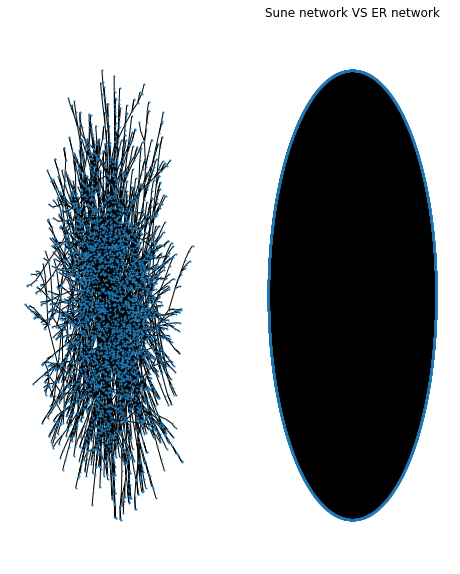

In [18]:
from cProfile import label
import networkx as nx
import random
from random import choice 


# Sune-network 
S = nx.Graph()
S.add_edge(0, 1)
NodeRep2 = [0,1]
N = 5000
nodes = [0,1]

# iteration that adds the 500 nodes with equal probability
for i in range(2,N):
    S.add_edge(i,random.choice(nodes))
    nodes.append(i)
    
    
# Generates the Erdos Renyi (ER) network 

ER = nx.gnm_random_graph(N, N-1)

# Plot the two network 
fig = plt.figure("Sune vs. Network", figsize=(14, 10))
ER = nx.gnm_random_graph(N, N-1)
subax1 = plt.subplot(121, label = 'Sune network')
nx.draw(S, with_labels=False, node_size=1)
subax2 = plt.subplot(122, label = 'Sune network')
nx.draw_shell(ER, with_labels=False, node_size=1)

plt.title("Sune network VS ER network")

    


    


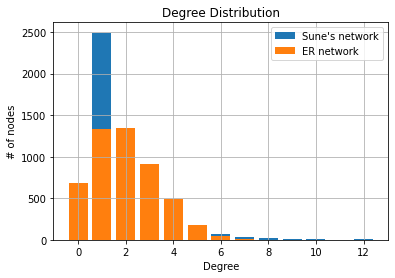

In [19]:

import numpy
degree_sequence = sorted((d for n, d in S.degree()), reverse=True)
dmax = max(degree_sequence)
degree_sequence2 = sorted((d for n, d in ER.degree()), reverse=True)
dmax2 = max(degree_sequence2)



plt.xlabel("Degree")
plt.ylabel("# of nodes")
plt.title("Degree plot")

plt.bar(*np.unique(degree_sequence, return_counts=True), label ="Sune's network")
plt.bar(*np.unique(degree_sequence2, return_counts=True), label = "ER network" )

plt.xlabel("Degree")
plt.ylabel("# of nodes")
plt.title("Degree Distribution")
plt.grid("True")
#plt.legend(["Sune's network ", "ER network"])
plt.legend()

First compairing the two graphs seen on the first figure (sune vs netork). The ER has highly detailed in wiring to the point that it is black and the Sune network is also very dense in the middle. Sune network has a higher frequency of nodes with degree = 1 than the ER network and from the histogram it could also seem that the sune network has higher spread across degree. Where as the ER network does not have significant frequency of nodes with the degrees after 8.